# Final Project
Chase McDonald

# Variables:
Company's stock prices (dollars) = 'BHP', 'LIN', 'RIO', 'VALE', 'CTA-PB', 'FCX', 'CTA-PA', 'SHW','GOOG', 'GOOGL', 'DIS', 'CMCSA', 'VZ', 'NFLX', 'T','AMZN', 'TSLA', 'HD', 'TM', 'NKE', 'MCD', 'LOW','WMT', 'PG', 'KO', 'COST', 'PEP', 'PM', 'BUD', 'DEO','XOM', 'CVX', 'SHEL', 'PTR', 'TTE', 'COP', 'EQNR', 'BP','V', 'BRK-A', 'V', 'JPM', 'BAC', 'MA', 'UNH', 'JNJ', 'PFE', 'LLY', 'NVO', 'TMO', 'ABT','UPS', 'UNP', 'RTX', 'HON', 'DE', 'LMT', 'CAT', 'BOE','PLD', 'AMT', 'CCI', 'PSA', 'EQIX', 'SPG-PJ', 'SPG', 'WELL','MSFT', 'AAPL', 'NVDA', 'TSM', 'ASML', 'AVGO', 'CSCO', 'ORCL','NEE', 'DUK', 'SO', 'D', 'NGG', 'SRE'

Oil Prices (dollars) = 'CL=F'



The crude oil market has been a consistently volatile market over the years. This project intends to find a link between the volatile crude oil market and the NYSE.

This final project takes the price of crude oil and stocks over the past 17 years by industry to look for a correlation between the two.
I chose to use large companies that have large market caps. I chose the 8 largest companies in each industry to weigh the magnitude of effects since these firms are somewhat representative of the industry. 
I chose daily data in order to derive the most data points for each industry. Also, I used closing price which is the price the stock ended at when the NYSE closed.

# Research Question:

This project attempts to find which companies are the biggest winners and which are the biggest losers with increasing crude oil prices. Typically, a company's value comes from the price of its stock. Therefore, this project seeks to determine which companies flourished most with increasing oil price by way of increasing stock price and which were hurt most. If stock price decreased with increasing oil prices, it was concluded these companies would be "losers." 

Secondly, the model derived from this project will help later investors make predictions about stock value with future inferences on the price of crude oil. This will be done through the use of a simple and multivariate regression model for 88 of the biggest companies drawn from every type of industry.



In [1]:
pip install yfinance 

In [2]:
pip install yahoofinancials 

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: yahoofinancials in c:\users\cmcdo\anaconda3\lib\site-packages (1.6)



# Collecting the Data:

Import packages to scrap:

In [3]:
import pandas as pd                             
import yfinance as yf                                           #particular for yahoo finance (scrapes prices from yahoo)
from yahoofinancials import YahooFinancials

Using ".get"  function from yahoofinancials package to pull in all the prices of each stock listed above back to 2005:

In [4]:
#Loading in all stocks
stocks = ['BHP', 'LIN', 'RIO', 'VALE', 'CTA-PB', 'FCX', 'CTA-PA', 'SHW','GOOG', 'GOOGL', 'FB', 'DIS', 'CMCSA', 'VZ', 'NFLX', 'T','AMZN', 'TSLA', 'HD', 'BABA', 'TM', 'NKE', 'MCD', 'LOW','WMT', 'PG', 'KO', 'COST', 'PEP', 'PM', 'BUD', 'DEO','XOM', 'CVX', 'SHEL', 'PTR', 'TTE', 'COP', 'EQNR', 'BP','V', 'BRK-A', 'V', 'JPM', 'BAC', 'MA', 'JPM-PC', 'JPM-PD','UNH', 'JNJ', 'PFE', 'ABBV', 'LLY', 'NVO', 'TMO', 'ABT','UPS', 'UNP', 'RTX', 'HON', 'DE', 'LMT', 'CAT', 'BOE','PLD', 'AMT', 'CCI', 'PSA', 'EQIX', 'SPG-PJ', 'SPG', 'WELL','MSFT', 'AAPL', 'NVDA', 'TSM', 'ASML', 'AVGO', 'CSCO', 'ORCL','NEE', 'DUK', 'SO', 'D', 'DUK-PA', 'DCUE', 'NGG', 'SRE']                  #selected stocks that will be scraped for closing price data

yahoo_financials = YahooFinancials(stocks)

data = yahoo_financials.get_historical_price_data(start_date='2005-12-31', 
                                                  end_date='2022-03-30', 
                                                  time_interval='daily')

stock_prices = pd.DataFrame({
    a: {x['formatted_date']: x['adjclose'] 
        for x in data[a]['prices']} 
        for a in stocks
})

print(stock_prices)
stock_prices.describe()

                  BHP         LIN        RIO       VALE     CTA-PB        FCX  \
2006-01-03  20.032454   38.719254  17.793262   5.386897  38.191772  19.062473   
2006-01-04  20.484606   38.409958  18.044876   5.527207  38.191772  20.166117   
2006-01-05  20.066786   38.302086  17.575571   5.559778  38.890404  19.507977   
2006-01-06  20.461710   39.129253  17.917662   5.637451  38.784187  19.926497   
2006-01-09  20.793678   38.409958  17.895039   5.712616  38.831379  19.774612   
...               ...         ...        ...        ...        ...        ...   
2022-03-23  72.959999  307.299988  77.879997  19.930000  94.772766  49.654343   
2022-03-24  74.269997  318.040009  78.300003  20.020000  94.604889  51.289219   
2022-03-25  75.339996  318.739990  79.519997  19.940001  94.802292  51.767719   
2022-03-28  75.589996  322.640015  78.529999  19.969999  96.747818  50.112907   
2022-03-29  75.629997  326.339996  78.379997  19.950001  99.739822  49.933468   

               CTA-PA      

,BHP,LIN,RIO,VALE,CTA-PB,FCX,CTA-PA,SHW,GOOG,GOOGL,...,CSCO,ORCL,NEE,DUK,SO,D,DUK-PA,DCUE,NGG,SRE
count,4088.000000,4088.000000,4088.000000,4088.000000,4007.000000,4088.000000,3922.000000,4088.000000,4088.000000,4088.000000,...,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,760.000000,701.000000,4088.000000,4088.000000
mean,42.151826,116.124640,32.352464,10.667410,70.611891,23.538602,59.791548,85.626039,739.496199,743.016789,...,25.480775,34.935489,26.603505,52.238501,32.830587,46.028654,25.046740,92.164085,42.349863,71.763170
std,13.158245,69.404088,14.192223,4.572130,21.136239,10.699840,16.996559,79.477798,655.996236,651.383683,...,12.971312,18.282862,22.001229,22.715100,13.833194,19.734549,1.469346,4.628133,12.854632,35.609953
min,14.908669,36.040031,6.110333,1.558971,37.378242,3.578305,32.249535,10.926766,128.239334,128.848846,...,9.849672,10.247930,5.876177,19.342476,14.515653,16.067873,20.149940,66.548401,18.216400,24.184330
25%,31.730186,66.013393,23.347930,7.252156,50.842968,13.337317,43.987545,18.840830,268.121262,269.395653,...,15.830609,19.351211,9.890009,29.590703,19.451920,25.572400,24.084045,89.670410,31.629862,36.895750
50%,43.081949,98.462585,28.593042,10.111356,71.222977,23.569506,61.539234,59.477381,525.517181,534.424988,...,19.808894,32.349257,18.489616,49.933239,30.342155,49.354408,25.493644,92.100677,44.036274,72.272182
75%,49.962468,143.335457,37.225086,14.072939,86.454220,31.819832,73.894928,126.761696,1048.302460,1054.604980,...,36.337853,45.205463,35.880932,69.021585,39.783962,63.066605,26.169926,95.312767,52.986644,99.033621
max,81.000000,345.045563,83.029579,22.953182,113.261795,51.767719,94.512596,351.343994,3014.179932,2996.770020,...,63.152836,102.863983,92.845772,109.975502,71.398537,84.889999,27.319021,101.849998,75.760002,164.940002


Using ".get" function from yahoofinancials package to pull in all the prices of oil back to 2005:

In [5]:
#another scource for crude oil ($/barrel)
crude_oil = ['CL=F']                  #selected stocks that will be scraped for closing price data

yahoo_financials = YahooFinancials(crude_oil)

data = yahoo_financials.get_historical_price_data(start_date='2005-12-31', 
                                                  end_date='2022-03-30', 
                                                  time_interval='daily')

oilprices_df = pd.DataFrame({
    a: {x['formatted_date']: x['adjclose'] 
        for x in data[a]['prices']} 
        for a in crude_oil
})

print(oilprices_df)


                  CL=F
2006-01-03   63.139999
2006-01-04   63.419998
2006-01-05   62.790001
2006-01-06   64.209999
2006-01-09   63.500000
...                ...
2022-03-23  114.930000
2022-03-24  112.339996
2022-03-25  113.900002
2022-03-28  105.959999
2022-03-29  104.239998

[4101 rows x 1 columns]


Merge the datasets (oil and stock prices) into one dataframe:

In [6]:
from functools import reduce

dfs = [oilprices_df,stock_prices] 

merged_df = reduce(lambda l, r: pd.merge(l, r,left_index=True, right_index=True, how="left"), dfs) #merges on index

merged_df.describe() #summary statistics of the uncleaned data set.

,CL=F,BHP,LIN,RIO,VALE,CTA-PB,FCX,CTA-PA,SHW,GOOG,...,CSCO,ORCL,NEE,DUK,SO,D,DUK-PA,DCUE,NGG,SRE
count,4087.000000,4086.000000,4086.000000,4086.000000,4086.000000,4005.000000,4086.000000,3920.000000,4086.000000,4086.000000,...,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,760.000000,701.000000,4086.000000,4086.000000
mean,71.165451,42.158256,116.129349,32.357209,10.670222,70.605177,23.544473,59.784550,85.626627,739.481278,...,25.480252,34.935112,26.603845,52.234805,32.828223,46.023259,25.046740,92.164085,42.345171,71.757189
std,22.618518,13.158248,69.420749,14.194027,4.571459,21.139356,10.699092,16.998070,79.497241,656.156361,...,12.974466,18.287327,22.006598,22.720040,13.836157,19.737868,1.469346,4.628133,12.855947,35.617552
min,-37.630001,14.908669,36.040031,6.110333,1.558971,37.378242,3.578305,32.249535,10.926766,128.239334,...,9.849672,10.247930,5.876177,19.342476,14.515653,16.067873,20.149940,66.548401,18.216400,24.184330
25%,52.950001,31.764701,66.000767,23.349627,7.265387,50.842968,13.337770,43.985973,18.837866,268.113785,...,15.830432,19.346707,9.889104,29.590200,19.448617,25.568656,24.084045,89.670410,31.628138,36.895128
50%,68.669998,43.085117,98.443882,28.595837,10.118300,71.222977,23.624488,61.537239,59.431183,525.384216,...,19.807821,32.340315,18.462642,49.923063,30.326278,49.200809,25.493644,92.100677,44.029741,72.231445
75%,90.445000,49.963431,143.426170,37.225086,14.074216,86.459648,31.826374,73.903008,126.785408,1048.487457,...,36.351077,45.206783,35.887745,69.041868,39.786770,63.067497,26.169926,95.312767,52.982341,99.042788
max,145.289993,81.000000,345.045563,83.029579,22.953182,113.261795,51.767719,94.512596,351.343994,3014.179932,...,63.152836,102.863983,92.845772,109.975502,71.398537,84.889999,27.319021,101.849998,75.760002,164.940002


In [7]:
merged_df.to_excel("Merged_Data_Set3.xlsx") #saving excel to see UNCLEAN data in excel

Clean up the 'merged_df' by eliminating n/a values:

Note: A few stocks were dropped because the companies did not become public until after 2009. Therefore, to preserve as much data as possible these stocks (columns) were dropped: Facebook (FB), Alibaba (BABA), JP Morgan Chase (JPM-PD), Abbive (ABBV), Duke Energy Corp. (DUK-PA), and Dominion Energy Inc. (DCUE). Next, rows that were missing data points due to NYSE closures were dropped. After this, a clean data set was called "final_df"

In [63]:
#This is the clean (tidy) dataset:

midfinal_df = merged_df.drop(["FB","BABA","JPM-PC","JPM-PD","ABBV","DUK-PA","DCUE"], axis=1) # drops all companies that did not go public until after 2009.
final_df= midfinal_df.dropna(axis=0, how = 'any', thresh = None) #drop all horizontal rows missing data.
print(final_df.isna().sum())                #checks for n/a values in final_df

final_df.describe()           #summary statistics of the CLEAN data                           


#End of Data merging

CL=F    0
BHP     0
LIN     0
RIO     0
VALE    0
       ..
DUK     0
SO      0
D       0
NGG     0
SRE     0
Length: 81, dtype: int64


,CL=F,BHP,LIN,RIO,VALE,CTA-PB,FCX,CTA-PA,SHW,GOOG,...,ASML,AVGO,CSCO,ORCL,NEE,DUK,SO,D,NGG,SRE
count,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,...,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000
mean,69.438850,45.007972,139.367877,34.851886,10.345000,80.328764,22.690025,67.283119,111.581482,926.408107,...,182.197794,166.808359,28.684498,41.941274,33.248827,61.820755,38.472192,54.971629,47.601199,86.274172
std,22.848180,12.998136,67.127437,14.530682,4.496144,15.326895,11.125858,12.102121,78.230315,671.073438,...,195.988892,149.277948,13.729817,16.473811,22.321099,19.132390,11.956804,15.495655,10.599174,31.029094
min,-37.630001,15.001871,59.699455,13.403522,1.558971,48.625439,3.578305,42.162369,19.561243,217.220810,...,17.537003,14.087401,10.001836,18.232561,8.582191,28.212990,19.296225,24.233196,22.179279,32.121754
25%,50.225001,35.979426,92.759056,25.285353,7.426270,68.079063,12.170065,58.920515,53.728145,432.422935,...,72.449833,29.113544,16.808050,29.414779,15.849944,46.868815,29.289624,41.332757,41.468409,62.504599
50%,65.514999,46.254162,108.905354,30.216678,9.952747,80.512833,21.374677,68.462395,89.168365,738.524994,...,98.384819,125.827595,23.635518,37.230639,25.424661,61.117861,36.620018,56.583652,49.046778,87.129646
75%,92.062498,51.917692,166.188564,38.837384,13.329531,89.792404,31.696786,75.078262,144.727589,1170.532501,...,198.074787,242.236328,40.857911,49.422965,44.820509,76.031834,45.351583,67.456165,54.884638,110.599413
max,123.699997,81.000000,345.045563,83.029579,20.761957,113.261795,51.767719,94.512596,351.343994,3014.179932,...,880.515686,669.751038,63.152836,102.863983,92.845772,109.975502,71.398537,84.889999,75.760002,164.940002


Save clean dataframe to computer for safety called "final_data":

In [9]:
final_df.to_excel(r"C:\Users\cmcdo\OneDrive - University of Tennessee\Desktop\Final_data.xlsx", index=True) # saving to excel to view CLEAN table format

Now this project contains a clean dataset called "final_df" in python. It is merged on dates in order to have a longitudinal series of data. This dataset can now be used in univariate regression to establish which stock is most affected by increased oil prices.

The code below is used to generate the change in stock price for every 1-dollar increase in the price of crude oil. This code uses simple regression to estimate a company's stock price as a function of only crude oil price. This will allow for investors to make rough future estimates on the valuation of a company's stock when crude oil futures are announced.

Econometric Model: 

Company Stock Price ($) = B_0 + B_1(Crude Oil Price)

When the regression is run, a value for Crude Oil Price can be plugged into "Crude Oil Price" in the output equations to determine an estimate for  each company's stock price.

# Regression Model

In [50]:
from sklearn import linear_model  

#List of all the companies that will be observed in this model
tickers = ['BHP', 'LIN', 'RIO', 'VALE', 'CTA-PB', 'FCX', 'CTA-PA', 'SHW','GOOG', 'GOOGL', 'DIS', 'CMCSA', 'VZ', 'NFLX', 'T','AMZN', 'TSLA', 'HD', 'TM', 'NKE', 'MCD', 'LOW','WMT', 'PG', 'KO', 'COST', 'PEP', 'PM', 'BUD', 'DEO','XOM', 'CVX', 'SHEL', 'PTR', 'TTE', 'COP', 'EQNR', 'BP','V', 'BRK-A', 'V', 'JPM', 'BAC', 'MA', 'UNH', 'JNJ', 'PFE', 'LLY', 'NVO', 'TMO', 'ABT','UPS', 'UNP', 'RTX', 'HON', 'DE', 'LMT', 'CAT', 'BOE','PLD', 'AMT', 'CCI', 'PSA', 'EQIX', 'SPG-PJ', 'SPG', 'WELL','MSFT', 'AAPL', 'NVDA', 'TSM', 'ASML', 'AVGO', 'CSCO', 'ORCL','NEE', 'DUK', 'SO', 'D', 'NGG', 'SRE']

stock_price_prediction = linear_model.LinearRegression()
for company in tickers:
    
# Building the models components
    
    y= final_df[[company]] #define y  
    X = final_df[["CL=F"]] #define X
   
# fit the model
    stock_price_prediction.fit(X, y)

#  the coefficients
    beta_0 = stock_price_prediction.intercept_ #intercept
    beta_1 = stock_price_prediction.coef_[0] #slope
  
   #print the univariate regression model
    print("The regression model is:", "Price of" , company, "=", beta_0, "+", beta_1,"Crude Oil Price")
print("R^2: ", stock_price_prediction.score(X,y)) #R^2 for the model

The regression model is: Price of BHP = [25.65294704] + [0.27873481] Crude Oil Price
The regression model is: Price of LIN = [191.66611005] + [-0.75315523] Crude Oil Price
The regression model is: Price of RIO = [36.14812909] + [-0.0186674] Crude Oil Price
The regression model is: Price of VALE = [2.40176759] + [0.11439176] Crude Oil Price
The regression model is: Price of CTA-PB = [105.89082626] + [-0.36812335] Crude Oil Price
The regression model is: Price of FCX = [-4.23690567] + [0.38777904] Crude Oil Price
The regression model is: Price of CTA-PA = [86.64950553] + [-0.27889843] Crude Oil Price
The regression model is: Price of SHW = [209.4159361] + [-1.40892964] Crude Oil Price
The regression model is: Price of GOOG = [1561.59310988] + [-9.14740094] Crude Oil Price
The regression model is: Price of GOOGL = [1576.49253866] + [-9.29810863] Crude Oil Price
The regression model is: Price of DIS = [162.48702985] + [-1.0018104] Crude Oil Price
The regression model is: Price of CMCSA = [

The R^2 here indicates that 30% of the variation in stock price is due to variation in crude oil price

Run the regression in log-linear format:

In [56]:
from sklearn import linear_model
import numpy as np   

#List of all the companies that will be observed in this model
tickers = ['BHP', 'LIN', 'RIO', 'VALE', 'CTA-PB', 'FCX', 'CTA-PA', 'SHW','GOOG', 'GOOGL', 'DIS', 'CMCSA', 'VZ', 'NFLX', 'T','AMZN', 'TSLA', 'HD', 'TM', 'NKE', 'MCD', 'LOW','WMT', 'PG', 'KO', 'COST', 'PEP', 'PM', 'BUD', 'DEO','XOM', 'CVX', 'SHEL', 'PTR', 'TTE', 'COP', 'EQNR', 'BP','V', 'BRK-A', 'V', 'JPM', 'BAC', 'MA', 'UNH', 'JNJ', 'PFE', 'LLY', 'NVO', 'TMO', 'ABT','UPS', 'UNP', 'RTX', 'HON', 'DE', 'LMT', 'CAT', 'BOE','PLD', 'AMT', 'CCI', 'PSA', 'EQIX', 'SPG-PJ', 'SPG', 'WELL','MSFT', 'AAPL', 'NVDA', 'TSM', 'ASML', 'AVGO', 'CSCO', 'ORCL','NEE', 'DUK', 'SO', 'D', 'NGG', 'SRE']

stock_price_prediction = linear_model.LinearRegression()
for company in tickers:
    
# Building the models components
    
    y= np.log(final_df[[company]]) #define y in logarithmic form 
    X = final_df[["CL=F"]] #define X
   
# fit the model
    stock_price_prediction.fit(X, y)

#  the coefficients
    beta_0 = stock_price_prediction.intercept_
    beta_1 = stock_price_prediction.coef_[0]
  
   #print the univariate regression model
    print("The regression model is:", "Price of" , company, "=", beta_0, "+", beta_1,"Crude Oil Price")
print("R^2: ", stock_price_prediction.score(X,y)) #R^2 for the model

The regression model is: Price of BHP = [3.24044408] + [0.00749164] Crude Oil Price
The regression model is: Price of LIN = [5.26902869] + [-0.00614498] Crude Oil Price
The regression model is: Price of RIO = [3.46291485] + [0.00022855] Crude Oil Price
The regression model is: Price of VALE = [1.26863023] + [0.01372767] Crude Oil Price
The regression model is: Price of CTA-PB = [4.70716682] + [-0.00488838] Crude Oil Price
The regression model is: Price of FCX = [1.63407782] + [0.01946283] Crude Oil Price
The regression model is: Price of CTA-PA = [4.50394207] + [-0.00449085] Crude Oil Price
The regression model is: Price of SHW = [5.75973027] + [-0.01878059] Crude Oil Price
The regression model is: Price of GOOG = [7.66073812] + [-0.01529203] Crude Oil Price
The regression model is: Price of GOOGL = [7.68011546] + [-0.01544377] Crude Oil Price
The regression model is: Price of DIS = [5.37930564] + [-0.01396074] Crude Oil Price
The regression model is: Price of CMCSA = [4.20547599] + [-

The R^2 here indicates that 35% of the variation in stock price is due to variation in crude oil price

The code above indicates the change in price as a percentage change. For example, in the first line of output using BHP, a 1 dollar increase in the price of oil would increase the stock price of BHP by 0.75%. This was done in order to control for the stocks magnitude differences.

The model outputed in the two cells above has a few takeaways:

First, the company that is most negatively affected by an increase in oil price (using percent change regression) is NFLX. This is Netflix, a movie streaming platform. With a 1-dollar increase in the price of oil, the price of Netflix's stock is estimated to fall by 3.3%. In dollars, this equates to a $3.46 decrease in NFLX stock price after a 1-dollar increase in the price of crude oil. Note this is much higher than exepected, which is most likely due to the fact that this univariate model has no controls.

The company that was affected most positively by a 1-dollar increase in price was FCX. FCX, or Freeport-McMoRan is a U.S. mining company. The price of this stock was expected to increase 1.9% for every dollar increase in crude oil. This equates to a $0.38 increase in real dollars.

Lastly, the stock least affected by a change in oil price is RIO. RIO, or Rio Tinto is a large metal mining company. The value of this stock is expected to only decrease by 0.023% per dollar increase in oil price. 

The next step to undestanding the relationship between oil price and a company's stock price was to control for the variation in stock price caused by stock valuation changes of competitors or suppliers. This was done by using a multivariate regression model using crude oil price as the variable of interest (X or independent variable) with 78 controls (the price of other companies' stock). 

Econometric Model:

Company Stock Price ($) = B_0 + B_1(Crude Oil Price) + stock_price_control_1 + stock_price_control_2 + ...

Note: this will contain every other company in this study as controls.

In [12]:
from sklearn import linear_model

#List of all the companies that will be observed in this model
tickers = ['BHP', 'LIN', 'RIO', 'VALE', 'CTA-PB', 'FCX', 'CTA-PA', 'SHW','GOOG', 'GOOGL', 'DIS', 'CMCSA', 'VZ', 'NFLX', 'T','AMZN', 'TSLA', 'HD', 'TM', 'NKE', 'MCD', 'LOW','WMT', 'PG', 'KO', 'COST', 'PEP', 'PM', 'BUD', 'DEO','XOM', 'CVX', 'SHEL', 'PTR', 'TTE', 'COP', 'EQNR', 'BP','V', 'BRK-A', 'V', 'JPM', 'BAC', 'MA', 'UNH', 'JNJ', 'PFE', 'LLY', 'NVO', 'TMO', 'ABT','UPS', 'UNP', 'RTX', 'HON', 'DE', 'LMT', 'CAT', 'BOE','PLD', 'AMT', 'CCI', 'PSA', 'EQIX', 'SPG-PJ', 'SPG', 'WELL','MSFT', 'AAPL', 'NVDA', 'TSM', 'ASML', 'AVGO', 'CSCO', 'ORCL','NEE', 'DUK', 'SO', 'D', 'NGG', 'SRE']

stock_price_prediction = linear_model.LinearRegression()
for company in tickers:
    
# Building the models components
    
    companies=np.log(final_df[[company]]) #define y
    multivariate_X = final_df[['CL=F','BHP', 'LIN', 'RIO', 'VALE', 'CTA-PB', 'FCX', 'CTA-PA', 'SHW','GOOG', 'GOOGL', 'DIS', 'CMCSA', 'VZ', 'NFLX', 'T','AMZN', 'TSLA', 'HD', 'TM', 'NKE', 'MCD', 'LOW','WMT', 'PG', 'KO', 'COST', 'PEP', 'PM', 'BUD', 'DEO','XOM', 'CVX', 'SHEL', 'PTR', 'TTE', 'COP', 'EQNR', 'BP','V', 'BRK-A', 'V', 'JPM', 'BAC', 'MA', 'UNH', 'JNJ', 'PFE', 'LLY', 'NVO', 'TMO', 'ABT','UPS', 'UNP', 'RTX', 'HON', 'DE', 'LMT', 'CAT', 'BOE','PLD', 'AMT', 'CCI', 'PSA', 'EQIX', 'SPG-PJ', 'SPG', 'WELL','MSFT', 'AAPL', 'NVDA', 'TSM', 'ASML', 'AVGO', 'CSCO', 'ORCL','NEE', 'DUK', 'SO', 'D', 'NGG', 'SRE']] #define X
   
# fit the model
    stock_price_prediction.fit(multivariate_X, companies)

# the coefficients
    beta_0 = stock_price_prediction.intercept_
    beta_1 = stock_price_prediction.coef_[0]
  
   #print the multivariate regression model
    print("The regression model is:", "Price of" , company, "=", beta_0, "+", beta_1,"Crude Oil Price")

The regression model is: Price of BHP = [2.62618097] + [ 6.00089364e-04  2.08519073e-02 -3.43351201e-04 -1.16460508e-03
 -8.66073764e-04  4.33988212e-04  2.56415966e-03  4.32015870e-03
 -2.98552822e-04 -4.09366564e-04  3.43562047e-04 -3.06060145e-04
  3.90708434e-03 -3.44793344e-03 -2.34342610e-05 -1.31806338e-03
 -3.05450014e-05 -3.22493735e-05 -2.34666320e-04  3.72500195e-04
 -6.40673122e-04 -4.57716126e-04  5.74174404e-04  5.56781036e-04
  4.35486070e-04 -1.49102331e-03 -5.42664054e-04 -1.00511528e-04
 -5.09739695e-04 -8.91733535e-04  4.10332859e-04 -5.76394905e-03
  1.21961670e-03  4.75657189e-03  3.69602359e-04 -8.36071720e-04
  2.56408498e-04  6.03184795e-03 -7.86564868e-04  6.15231334e-05
 -1.10596607e-07  6.15231334e-05 -2.93517976e-05  2.14605511e-04
  1.53634713e-04 -3.32813961e-05 -2.04485536e-04  3.97038807e-03
 -7.68830619e-04 -1.40587829e-03  6.27859961e-05  1.34723968e-03
  1.20978116e-03  7.54491989e-04  1.13243491e-03 -5.32192826e-04
  6.25860375e-05 -1.58985931e-04 -1

The number that we are interested in here is the first number in the second set of brackets of each regression model. This number represents the % change in the price of each company in response to a 1-dollar increase in the price of a barrel of crude oil.

When looking at the multivariate regression, it was concluded that the most positvely correlated stock price to oil price was TSLA. This was not a surprise, but it was a very interesting finding. TSLA or Tesla is a electric car company that has an enourmous market cap and a large portion of the electric car industry belongs to Tesla. 

As the price of oil increases by 1-dollar, holding the other 80  major companies stock prices constant, Tesla stock is estimated to increase by 1.02%. This estimate indicates a clear relationship between rising prices of gas and consumer preferences toward electric vehicle alternatives. As the price of crude oil, which is later refined into gasoline, increases, the value of the electric car maker, Tesla, will likely increase!

# Visualizations

Vizualizing the biggest winner (FCX), biggest loser (NFLX), and most unaffected (RIO) from simple regression:

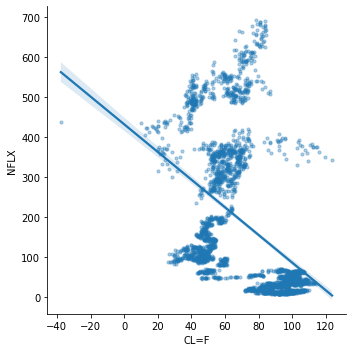

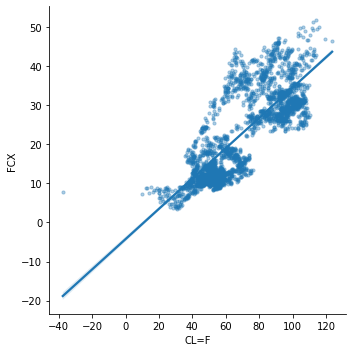

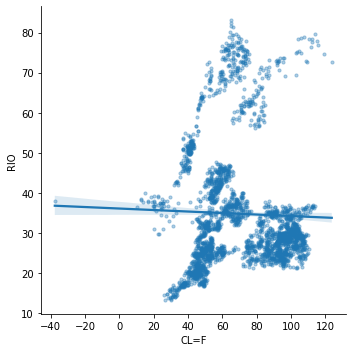

In [43]:
import pandas as pd                                 # Manage the data set
import numpy as np                                  # Perform calculations like log and square
import matplotlib.pyplot as plt                     # Graph data
import seaborn as sns 

sns.lmplot(
    data=final_df, x="CL=F", y="NFLX", 
    scatter_kws=dict(s=10, alpha=0.35)
);

sns.lmplot(
    data=final_df, x="CL=F", y="FCX", 
    scatter_kws=dict(s=10, alpha=0.35)
);

sns.lmplot(
    data=final_df, x="CL=F", y="RIO", 
    scatter_kws=dict(s=10, alpha=0.35)
);

As was seen in the simple regression, NFLX is predicted to lose value when oil prices increase, FCX was predicted to increase in value with oil price increases, and RIO did not seem to be affected by the price of oil.

Changing the index to a variable called "Date" to vizualize longitudinal data:

In [14]:
df_with_dates = final_df.copy()                                # Duplicate DataFrame
df_with_dates['Date'] = df_with_dates.index                    # Convert index to variable
df_with_dates #final column to the right now called "Date"

,CL=F,BHP,LIN,RIO,VALE,CTA-PB,FCX,CTA-PA,SHW,GOOG,...,AVGO,CSCO,ORCL,NEE,DUK,SO,D,NGG,SRE,Date
2010-06-29,75.940002,40.159012,60.783596,22.402903,13.729670,49.182491,23.238554,42.274132,20.590784,226.281845,...,15.839828,15.635090,18.478947,8.582191,28.530981,19.504950,24.609198,22.540594,32.862019,2010-06-29
2010-06-30,75.629997,39.284481,59.699455,21.505207,13.421018,48.625439,22.500338,42.162369,20.236874,221.644226,...,15.907807,15.410897,18.232561,8.651386,28.265985,19.296225,24.277067,22.179279,32.370808,2010-06-30
2010-07-01,72.949997,39.556976,60.312214,21.830738,13.580856,49.416092,22.138845,42.193394,20.456242,218.924423,...,16.172180,15.374746,18.309029,8.685102,28.212990,19.348398,24.427462,22.504469,32.121754,2010-07-01
2010-07-02,72.139999,39.740757,60.398640,21.865271,13.663534,49.805447,22.275829,42.652569,20.307076,217.459900,...,16.293047,15.280735,18.546919,8.686873,28.371984,19.354197,24.233196,22.570709,32.177086,2010-07-02
2010-07-06,71.980003,40.456860,60.854298,22.432493,13.575345,49.949196,22.523170,42.813889,20.421137,217.220810,...,15.764295,15.432599,18.963226,8.764936,28.654646,19.423777,24.527737,22.492422,32.557610,2010-07-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-23,114.930000,72.959999,307.299988,77.879997,19.930000,94.772766,49.654343,79.054237,247.639999,2770.070068,...,599.380005,54.109455,80.076744,82.570000,105.872604,68.158554,81.629997,73.489998,158.274994,2022-03-23
2022-03-24,112.339996,74.269997,318.040009,78.300003,20.020000,94.604889,51.289219,79.281464,249.929993,2826.239990,...,626.429993,54.129318,81.919533,83.699997,106.506874,68.663879,82.300003,74.099998,158.860001,2022-03-24
2022-03-25,113.900002,75.339996,318.739990,79.519997,19.940001,94.802292,51.767719,79.479050,245.210007,2830.429932,...,628.869995,54.596123,81.411522,83.940002,108.151993,70.278915,83.970001,74.889999,162.460007,2022-03-25
2022-03-28,105.959999,75.589996,322.640015,78.529999,19.969999,96.747818,50.112907,79.528450,250.580002,2839.000000,...,632.880005,54.764965,83.274231,84.430000,109.053841,70.348267,84.239998,74.540001,163.119995,2022-03-28


Must turn "Date" into a float to create visualizations:

In [15]:
df_with_dates['Date'] = df_with_dates['Date'].str.replace('-', '') #remove dashes from "Date"

df_with_dates['Date'] = df_with_dates['Date'].astype(float) #convert string to float
df_with_dates.info() #print info to see if object was changed to float

<class 'pandas.core.frame.DataFrame'>
Index: 2948 entries, 2010-06-29 to 2022-03-29
Data columns (total 82 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CL=F    2948 non-null   float64
 1   BHP     2948 non-null   float64
 2   LIN     2948 non-null   float64
 3   RIO     2948 non-null   float64
 4   VALE    2948 non-null   float64
 5   CTA-PB  2948 non-null   float64
 6   FCX     2948 non-null   float64
 7   CTA-PA  2948 non-null   float64
 8   SHW     2948 non-null   float64
 9   GOOG    2948 non-null   float64
 10  GOOGL   2948 non-null   float64
 11  DIS     2948 non-null   float64
 12  CMCSA   2948 non-null   float64
 13  VZ      2948 non-null   float64
 14  NFLX    2948 non-null   float64
 15  T       2948 non-null   float64
 16  AMZN    2948 non-null   float64
 17  TSLA    2948 non-null   float64
 18  HD      2948 non-null   float64
 19  TM      2948 non-null   float64
 20  NKE     2948 non-null   float64
 21  MCD     2948 non-null   flo

Now, it is important to vizualize the relationship that was seen from the multivariate regression model. Again, it was observed that as the price of oil goes up by 1-dollar, the price of Tesla's stock will appreciate in value. To see this, it is important to visualize the price of oil and the price of Tesla's stock on a longitudinal time scale to see if the correlation can be viewed.

The next cell uses matplotlib to create a scatter plot with both oil prices and TSLA stock prices over time (2010-present):


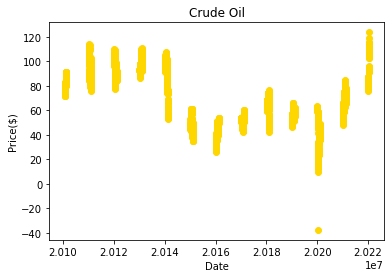

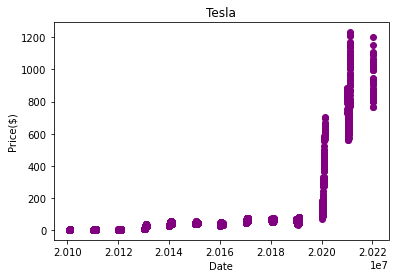

In [78]:
# plot a scatter plot

dates_x= df_with_dates['Date']
crudeoil_y= df_with_dates['CL=F']
TSLA_y= df_with_dates['TSLA']

ax1 = plt.scatter(dates_x, crudeoil_y) #creates the scatter plot
plt.xlabel("Date") #names the x-axis
plt.ylabel("Price($)") #names the y-axis
plt.title("Crude Oil") #names the title
ax1.set_facecolor('gold') #changes dot color
plt.show() #prints the plot

ax2 = plt.scatter(dates_x, TSLA_y) #creates the scatter plot
plt.xlabel("Date") #names the x-axis
plt.ylabel("Price($)") #names the y-axis
plt.title("Tesla") #names the title
ax2.set_facecolor('purple') #changes dot color
plt.show() #prints the plot


From this, it can be observed that there is no clear relationship between the price of oil and the price of Tesla's stock. The price of oil dropped significantly in 2020 due to COVID-19. It reached a point in 2020 that suppliers were paying others to take oil off of their hands. Tesla seems to recovered quickly after the pandemic to reach record highs over the past decade at around $1,200 prior to 2022. This jump may also be due to the recent spikes in gas prices. Therefore, past data does not show a clear correlation between the price of oil and Tesla's valuation until now. With the electric car industry beginning to establish itself as "relaible," consumers may be turning to alternative forms of transportation through Tesla's electric cars. That is likely why the late 2021 crude oil price increases have kept the valuation of Tesla's stock so high. Investors are using intuition to make inferences about why Tesla is the biggest winner of the recent crude oil price shocks. It is likely the price of oil increasing will continue to boost Tesla sales and boost investor confidence of those who take ownership in a reliable stock such as Tesla.

From the vizualization and econometric model in the cells above, it was concluded that using the multivariate regression to control for all other 80 major companies stock prices yielded the most accurate results. The regression predicts that holding the valuation of these other major companies constant, Tesla will be the biggesst winner for investors who seek to make capital gains off of Tesla's stock. Investors can roughly estimate that the price of Tesla's stock, as a percentage of its price, will increase 1.02% in value as the price of crude oil increases by $1.